#### <font color='green'> By: Vardhaman R P

   #### for dataset please visit https://github.com/vardhaman-datascience/splitwise-app-data-analysis  
   #### please rate and comment if it is helpful to you


In [ ]:
#export the splitwise groupdata as spreadsheet

In [187]:
import pandas as pd
import numpy as np
import re
import os
from matplotlib import pyplot as plt
import seaborn as sb

In [188]:
data=pd.read_csv('E:/Data_Science/Datasets/split_wise.csv')

In [189]:
data.columns=['Date','Description','Category','Cost','Currency','Pallavi','Arun','ShwetaJain','Rahul','Nikitha','Keerti','ambikapatil821','Shruthi.k','Megha','Vardhaman','Vanajakshi']

In [252]:
data.head()

,Date,Description,Category,Cost,Currency,Pallavi,Arun,ShwetaJain,Rahul,Nikitha,Keerti,ambikapatil821,Shruthi.k,Megha,Vardhaman,Vanajakshi
0,2017-05-15,1045,General,1045.0,INR,0.0,-348.33,0.0,696.66,0.0,0.0,0.0,0.0,0.0,-348.33,0.0
1,2017-05-15,212,General,212.0,INR,0.0,-212.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,212.00,0.0
2,2017-05-15,Ice cream,Groceries,170.0,INR,0.0,113.33,0.0,-56.67,0.0,0.0,0.0,0.0,0.0,-56.66,0.0
3,2017-05-15,Ananda rao,General,210.0,INR,0.0,140.00,0.0,-70.00,0.0,0.0,0.0,0.0,0.0,-70.00,0.0
4,2017-05-15,Book,General,600.0,INR,0.0,600.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,-600.00,0.0


In [190]:
data=data[:-2]

In [230]:
data['Cost']=data['Cost'].astype(float)

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 16 columns):
Date              2457 non-null object
Description       2457 non-null object
Category          2457 non-null object
Cost              2457 non-null float64
Currency          2457 non-null object
Pallavi           2457 non-null float64
Arun              2457 non-null float64
ShwetaJain        2457 non-null float64
Rahul             2457 non-null float64
Nikitha           2457 non-null float64
Keerti            2457 non-null float64
ambikapatil821    2457 non-null float64
Shruthi.k         2457 non-null float64
Megha             2457 non-null float64
Vardhaman         2457 non-null float64
Vanajakshi        2457 non-null float64
dtypes: float64(12), object(4)
memory usage: 307.2+ KB


In [253]:
data['Description'].unique()

array(['1045', '212', 'Ice cream', 'Ananda rao', 'Book', '100', 'Ticket',
       'Uta', 'Puffs', 'Breakfast', 'Roll', 'French fries', 'Soup',
       'Maggie', 'Dinner', 'Ola', 'Budy roti ghar', 'KRAZY BEE',
       'Extra tm', 'Perfume', 'Auto ', 'Max', 'Reliance', 'Rooftop',
       'Auto', 'Puri', 'noodles & noodles ', 'Golagappa', 'Shopping',
       'Jain paid Keerti P.', '127.17', 'Food point', 'T', 'Dress', '20',
       'Utsav', 'Socks', 'Juice', 'Watch', 'Majjige', 'Jain paid Arun c.',
       'Bhim', 'Barcelona fb T', 'RotiGhar', 'Bus', 'Jeans', '500',
       'Ondu motteya kate', 'Spiderman snacks', 'Spidey tickets',
       'Bhanashankri', 'Shenga', 'Shades', 'Beligge', 'Cab', 'Black Top',
       'Finger ring ', 'Golgappa', 'Tiffin', 'Batte', 'M1 sandwiches',
       'Nandi', 'Nandi amith nd u', 'Owes', 'Petrol + neer dose', 'Kd',
       'Twist and momos', 'Cake', 'Account', 'Water can', 'Bus to clg',
       'Monday idli', 'Bus ', 'Dmart', 'Recharge', 'Tea', 'Mop', 'Bulb',
       'V

# who drink more tea?

In [194]:
persons=['Pallavi','Arun','ShwetaJain','Rahul','Nikitha','Keerti','ambikapatil821','Shruthi.k','Megha','Vardhaman','Vanajakshi']

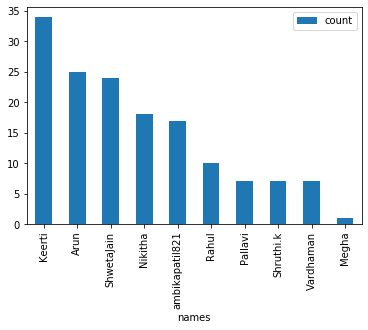

In [195]:
tea=['tea','Tea','TEA','cha','Cha','coffee','Coffe','Cffe','chyaai','chaa']
index=[]
for i in range(len(data)):
    x=data['Description'].iloc[i].split()
    for word in x:
        if word in tea:
            index.append(i)
        else:
            continue
            
tea_df=data.iloc[index]
list_=[]
for i in range(len(tea_df)):
    for j in persons:
        if tea_df.iloc[i][j]!=0:
            list_.append(j)

df1=pd.DataFrame(list_)
df1.columns=['names']
df3=pd.DataFrame(df1.groupby('names')['names'].count())
df3.columns=['count']
df3.sort_values('count',ascending=False,inplace=True)
df3.plot(kind='bar')


# which pair has  more transactions?

In [196]:
index=[]
for j in range(len(data)):
    combinations=[]
    for i in persons: 
        if data.iloc[j][i] !=0:
            combinations.append(i)
    index.append(combinations)
pair=[]
for i in index:
    if len(i)==2:
        pair.append(i)
result=[]
for i in pair:
    count=0
    for j in pair:
        if i==j:
            count=count+1
    x=[i,count]
    if x not in result:
        result.append(x)
    
df=pd.DataFrame(result)
df.columns=['pairs','count']
df.sort_values('count',ascending=False)

,pairs,count
29,"[Arun, Nikitha]",251
3,"[Arun, Keerti]",140
2,"[Arun, Rahul]",118
11,"[ShwetaJain, Keerti]",117
8,"[Arun, ambikapatil821]",75
20,"[Arun, ShwetaJain]",71
6,"[Keerti, ambikapatil821]",66
0,"[Arun, Vardhaman]",53
5,"[Rahul, Keerti]",52
31,"[Nikitha, Keerti]",40


# lets analyse  these top two  pair each

# arun_nikitha

In [198]:
arun_nikitha=data[(data['Arun']!=0)&(data['Nikitha']!=0)&(data['Pallavi']==0)&(data['ShwetaJain']==0)&(data['Rahul']==0)&(data['Keerti']==0)&(data['ambikapatil821']==0)&(data['Shruthi.k']==0)&(data['Megha']==0)&(data['Vardhaman']==0)&(data['Vanajakshi']==0)]

### how much they spent together..?

In [199]:
print('they spent',(arun_nikitha['Nikitha'].sum())*2,'Rs together')

they spent 15028.32 Rs together


In [200]:
arun_nikitha['Arun'].sum()


-7514.16

#### By this we can conclude that nikitha paid most of the time whenevr  only they go outside 

#  

## did they ever went to movie together..?

In [28]:
for i in arun_nikitha['Description']:
    j=i.split()
    for x in j:
        if x in ['Film','film','movie','Movie','MOVIE','FILM','picture']:
            print(i)
            print(arun_nikitha[arun_nikitha['Description']==i]['Date'])
            print('\n')

Film
2223    2019-01-07
Name: Date, dtype: object


Film auto
2224    2019-01-07
Name: Date, dtype: object




### yes they went on 7th Jan 2019 or (a day  back if they updated it later) 

#  

## who lents whom often and how much...?

In [29]:
xx=arun_nikitha[(arun_nikitha['Description']=='Lent')& (arun_nikitha['Arun']>=0)]['Arun'].sum()
countt=arun_nikitha[(arun_nikitha['Description']=='Lent')& (arun_nikitha['Arun']>=0)]['Arun'].count()
print('Arun has given lent to nikitha of amount of RS',xx,' in total')
print('Arun has given lent to nikitha',countt,'times in total')

Arun has given lent to nikitha of amount of RS 20835.0  in total
Arun has given lent to nikitha 29 times in total


In [30]:
xx=arun_nikitha[(arun_nikitha['Description']=='Lent')& (arun_nikitha['Nikitha']>=0)]['Nikitha'].sum()
countt=arun_nikitha[(arun_nikitha['Description']=='Lent')& (arun_nikitha['Nikitha']>=0)]['Nikitha'].count()
print('Nikitha has given lent to arun of amount of RS',xx,' in total')
print('Nikitha has given lent to arun',countt,'times in total')

Nikitha has given lent to arun of amount of RS 31241.0  in total
Nikitha has given lent to arun 53 times in total


# arun_keerti

In [31]:
arun_keerti=data[(data['Arun']!=0)&(data['Nikitha']==0)&(data['Pallzz']==0)&(data['ShwetaJain']==0)&(data['Rahul']==0)&(data['Keerti']!=0)&(data['ambikapatil821']==0)&(data['Shruthi.k']==0)&(data['Megha']==0)&(data['Varun']==0)&(data['Vanajakshi']==0)]

In [32]:
### how much they spent together..?

print('they spent',(arun_keerti['Keerti'].sum())*2,'Rs together')

they spent 15162.58 Rs together


In [33]:
arun_keerti['Arun'].sum()

-7581.29

### By this we can conclude that arun paid most of the time whenevr  only they go outside 

### did they ever went to movie together..?

In [34]:
data1=[]
for i in arun_keerti['Description']:
    j=i.split()
    for x in j:
        if x in ['Film','film','movie','Movie','MOVIE','FILM','picture']:
            print(i)
            data1.append(arun_keerti[arun_keerti['Description']==i]['Date'])
            print('\n')
if len(data1)==0:
    print('no data found ')

no data found 


#### they never went to film together according to the group data

In [35]:
data.head()

,Date,Description,Category,Cost,Currency,Pallzz,Arun,ShwetaJain,Rahul,Nikitha,Keerti,ambikapatil821,Shruthi.k,Megha,Varun,Vanajakshi
0,2017-05-15,1045,General,1045.00,INR,0.0,-348.33,0.0,696.66,0.0,0.0,0.0,0.0,0.0,-348.33,0.0
1,2017-05-15,212,General,212.00,INR,0.0,-212.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,212.00,0.0
2,2017-05-15,Ice cream,Groceries,170.00,INR,0.0,113.33,0.0,-56.67,0.0,0.0,0.0,0.0,0.0,-56.66,0.0
3,2017-05-15,Ananda rao,General,210.00,INR,0.0,140.00,0.0,-70.00,0.0,0.0,0.0,0.0,0.0,-70.00,0.0
4,2017-05-15,Book,General,600.00,INR,0.0,600.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,-600.00,0.0


# Group Activeness

In [46]:
import datetime

In [68]:
data['Date']=pd.to_datetime(data['Date']).dt.strftime('%b-%d-%Y')

In [91]:
month=[]
year=[]
for i in range(len(data)):
    month.append(data['Date'].iloc[i].split('-')[0])
    year.append(data['Date'].iloc[i].split('-')[2])
    
data['month']=month
data['year']=year

In [92]:
data.head()

,Date,Description,Category,Cost,Currency,Pallzz,Arun,ShwetaJain,Rahul,Nikitha,Keerti,ambikapatil821,Shruthi.k,Megha,Varun,Vanajakshi,date1,month,year
0,May-15-2017,1045,General,1045.00,INR,0.0,-348.33,0.0,696.66,0.0,0.0,0.0,0.0,0.0,-348.33,0.0,May 2017,May,2017
1,May-15-2017,212,General,212.00,INR,0.0,-212.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,212.00,0.0,May 2017,May,2017
2,May-15-2017,Ice cream,Groceries,170.00,INR,0.0,113.33,0.0,-56.67,0.0,0.0,0.0,0.0,0.0,-56.66,0.0,May 2017,May,2017
3,May-15-2017,Ananda rao,General,210.00,INR,0.0,140.00,0.0,-70.00,0.0,0.0,0.0,0.0,0.0,-70.00,0.0,May 2017,May,2017
4,May-15-2017,Book,General,600.00,INR,0.0,600.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,-600.00,0.0,May 2017,May,2017


In [154]:
year_2017=pd.DataFrame(data[data['year']=='2017'].groupby(['month'])['month'].count())
year_2018=pd.DataFrame(data[data['year']=='2018'].groupby(['month'])['month'].count())
year_2019=pd.DataFrame(data[data['year']=='2019'].groupby(['month'])['month'].count())

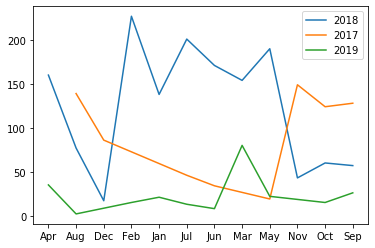

In [162]:
plt.plot(year_2018,label='2018')
plt.plot(year_2017,label='2017')
plt.plot(year_2019,label='2019')
plt.legend()

### group was more active in the year 2018 and less at 2019
### Reason: we passed out from our college in Aug 2018

#    

#   

## Days when we went to trip

In [177]:
for i in data['Description']:
    j=i.split()
    for x in j:
        if x in ['trip','Trip','trp']:
            print(i)
            print(data[data['Description']==i]['Date'])
            print('\n')

Trip (3995)=3700(keerti)+295(vardhaman)
378    Oct-01-2017
Name: Date, dtype: object


Trip and uta 
391    Oct-04-2017
Name: Date, dtype: object


Trip and ticket
419    Oct-12-2017
Name: Date, dtype: object


Trip
506     Nov-09-2017
2098    Sep-29-2018
Name: Date, dtype: object


Trip previous day uta
574    Nov-13-2017
Name: Date, dtype: object


Trip night uta
576    Nov-13-2017
Name: Date, dtype: object


Trip morning tiffin
577    Nov-13-2017
Name: Date, dtype: object


Enne trip
1035    Feb-23-2018
Name: Date, dtype: object


Trip
506     Nov-09-2017
2098    Sep-29-2018
Name: Date, dtype: object




## who eats junk food a lot..?

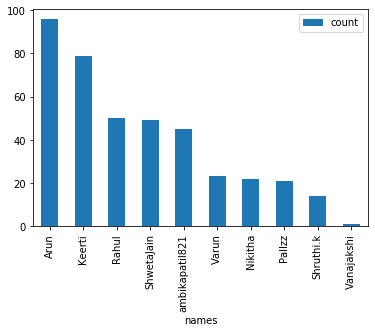

In [178]:
junk=['Puffs','French fries','noodles & noodles ', 'Golagappa','Rooftop','Puri','snacks','Finger ring ', 'Golgappa','M1 sandwiches','Twist and momos','Bhajji','Panipuri','Op Al and snacks','Pizza hut','Mirchi','Twister', 'girrmitt', 'cake', 'pav bhajji', 'Chats','Girrmitt & mirchiii','Pani puri','panipuri','Kachori', 'Bajji','Fingerchip','Sevpuri','Bhel','Puffs','French fries','noodles & noodles ', 'Golagappa','Rooftop','Puri','snacks','Finger ring ', 'Golgappa','M1 sandwiches','Twist and momos','Bhajji','Panipuri','Op Al and snacks','Pizza hut','Mirchi','Twister', 'girrmitt', 'cake', 'pav bhajji', 'Chats','Girrmitt & mirchiii','Pani puri','panipuri','Kachori', 'Bajji','Fingerchip','Sevpuri','Bhel','Chats','Girmittt','Bajji','Coke','Masal puri','Cutlet','Mangalore bajji', 'Rolls','Chilly', 'Mangalore bajji', 'Rolls','Potato twist','Golapappa','Dahi puri','Samosa','Food steet','Food street','Patato twist','Twist','Onion and chilly','Veg puff','Vada paav','Vada pav','Gobi+goglegappa','Aaaloooo', 'Aalllooo', 'Sandwich','Vada','Golgappq','Samosa+burger','Popcorn','Twister','Donut','Tornado','Pav+ bhel','Pani puri','Kachori chat','Uta(Soft drink)','Dhai puri','Lays','Gol gappa','Goli baje','Sandwich burgers','Cake lollypop etc','Masala puri','Manchurian','Bajji+girmit','Chole bature + french fries','Twist o twist','Taaza tindi', 'Masalpuri + gobi', 'Sugar ', 'Fries', 'Pani puri ','Vodka + masal puri','Golgappa ','Pizzaria', 'Fanta chips','Pani weds puri','Panipuri + masalpuri','Mirchi baji']
index=[]
for i in range(len(data)):
    x=data['Description'].iloc[i].split()
    for word in x:
        if word in junk:
            index.append(i)
        else:
            continue
            
junk_df=data.iloc[index]
list_=[]
for i in range(len(junk_df)):
    for j in persons:
        if junk_df.iloc[i][j]!=0:
            list_.append(j)

df1=pd.DataFrame(list_)
df1.columns=['names']
df3=pd.DataFrame(df1.groupby('names')['names'].count())
df3.columns=['count']
df3.sort_values('count',ascending=False,inplace=True)
df3.plot(kind='bar')

## who eats icecream a lot...?

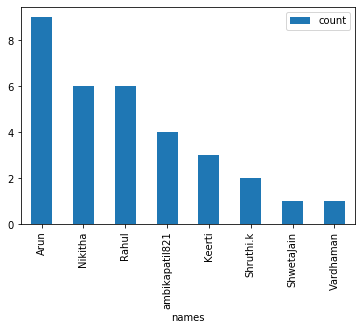

In [247]:
icecream=['Ice cream','Icecreme','Roller ice cream','kulfi','Kulfi','Icecream','Nicecream','Aichcreem','Ice Cream','Gadbad + auto','Gadbad','icecream','Polar']
index=[]
for i in range(len(data)):
    x=data['Description'].iloc[i].split()
    for word in x:
        if word in icecream:
            index.append(i)
        else:
            continue
            
icecream_df=data.iloc[index]
list_=[]
for i in range(len(icecream_df)):
    for j in persons:
        if icecream_df.iloc[i][j]!=0:
            list_.append(j)

df1=pd.DataFrame(list_)
df1.columns=['names']
df3=pd.DataFrame(df1.groupby('names')['names'].count())
df3.columns=['count']
df3.sort_values('count',ascending=False,inplace=True)
df3.plot(kind='bar')

#### intresting pallavi did not eat a single icecream with anyone of us

#   

## who all recieved the gift..?

In [181]:
for i in data['Description']:
    j=i.split()
    for x in j:
        if x in ['Gift','gift','GIFT','gft']:
            print(i)
            print(data[data['Description']==i]['Date'])
            print('\n')

Gift shwetha
660    Dec-05-2017
Name: Date, dtype: object


Shweta gift
1559    May-26-2018
Name: Date, dtype: object


Arun gift
1791    Jul-03-2018
Name: Date, dtype: object


Pallavi gift
2038    Aug-29-2018
Name: Date, dtype: object


Nikki's gift
2190    Nov-23-2018
Name: Date, dtype: object


Kulli parasailing gift
2221    Jan-06-2019
Name: Date, dtype: object




## how much we spent on bike rentals 

In [248]:
cost=[]
for i in data['Description']:
    j=i.split()
    for x in j:
        if x in ['bike','Bike','byk','BIKE']:
            cost.append(data[data['Description']==i]['Cost'].sum())
print('we have spent of amount',np.unique(np.array(cost)).sum(),'Rs  on bike rental')

we have spent of amount 13273.0 Rs  on bike rental


##### we would have  brought our own second hand bike 

#    

## there are few people in our group who stays in the same house, can I predict which are those who stays in a single home by using above data...?

### its simple we need to just collect descriptions which are mostly related to households 

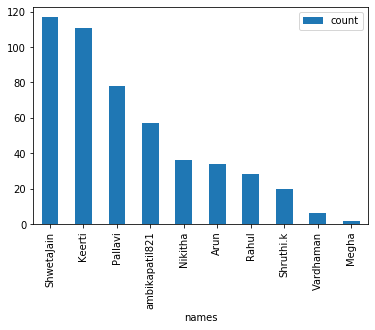

In [251]:
households=['Water can','Bulb','Saturday milk','Oil','Salt','Odonil','Electricity bill','Banana and onion','Water','Tomato','Onion tomato','Rava','New paper n watercan','Onion and chilly','Water Can','Acid+odonil+naphthalene','Electricity bill ','Dispenser+awalakki','Good life','Potato','Maggi+oil','Water Can+sugar','Gas','Water bill','Water+veggies','Current bill','Golgappa+cucumber','Milk+sugar','Freshner','Washingpowder']
index=[]
for i in range(len(data)):
    x=data['Description'].iloc[i].split()
    for word in x:
        if word in households:
            index.append(i)
        else:
            continue
            
households_df=data.iloc[index]
list_=[]
for i in range(len(households_df)):
    for j in persons:
        if households_df.iloc[i][j]!=0:
            list_.append(j)

df1=pd.DataFrame(list_)
df1.columns=['names']
df3=pd.DataFrame(df1.groupby('names')['names'].count())
df3.columns=['count']
df3.sort_values('count',ascending=False,inplace=True)
df3.plot(kind='bar')

### According to data
### Shwetajain,Keerti,Pallavi and AmbikaPatil mostly stayed in single home

### Actual:
### Shwetajain,Keerti,Pallavi  are the main people who stayed in the home but Ambika and nikita used to vist their home several times even though they stayed in the hostels 